# Car Price Prediction using Multiple Linear Regression

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1. Understanding the Data

In [2]:
df = pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape # (rows, columns)

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# unique value of each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [6]:
# description of the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**It is clear that the database has no null values. It has 10 categorical and 18 numerical columns.**

## 2. Data Cleaning

In [7]:
# Droping car_ID from the database
df=df.drop(['car_ID'],axis=1)

In [8]:
# Extracting Car Company from the CarName
df['CarName']=df['CarName'].str.split(' ').str[0]

In [9]:
# Unique Car company
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typo Error in Car Company name**

* maxda = mazda
* Nissan = nissan
* porsche = porcshce
* toyota = toyouta
* vokswagen = volkswagen = vw

In [10]:
# Renaming the typo errors in Car Company names

df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [11]:
# Changing the datatype of symboling as it is categorical variable
df['symboling']=df['symboling'].astype('str')

In [12]:
# Numerical and Categorical Columns
numerical_columns=df.select_dtypes(exclude=['object']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

## 3. Data Analysis

<Axes: xlabel='count', ylabel='CarName'>

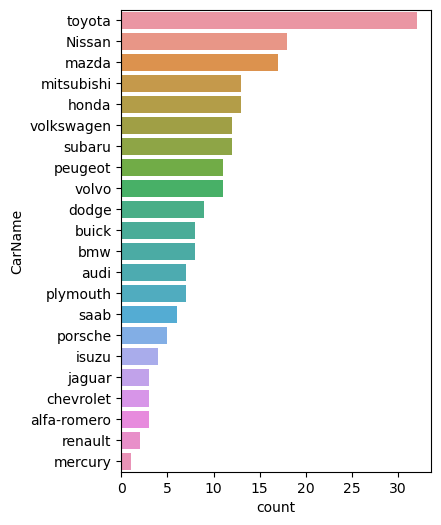

In [13]:
# Visualizing the most popular car in the database
plt.figure(figsize=(4,6))
order = df['CarName'].value_counts().index
sns.countplot(y='CarName',order=order,data=df)

**Toyota seems to be the most favoured cars and Mercury seems to be the least favoured cars.**

<Axes: xlabel='price', ylabel='Count'>

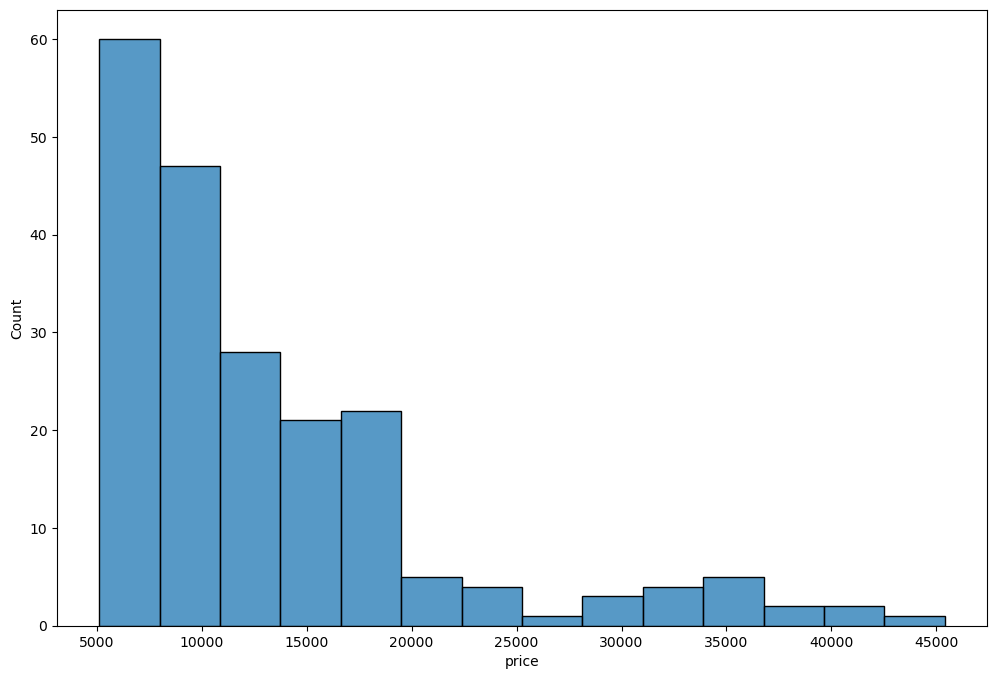

In [14]:
# Visualizing the most expensive car in the database
plt.figure(figsize=(12,8))
sns.histplot(df['price'])

In [15]:
# Correlation Matrix in numeric variable
Corr_mat=df[numerical_columns].corr()

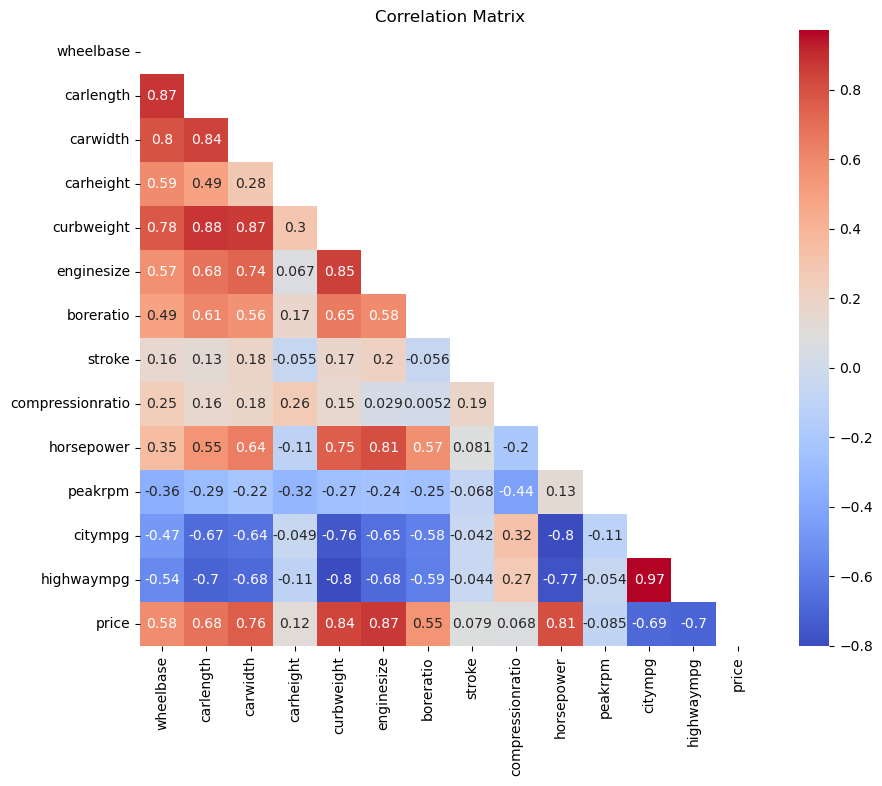

In [16]:
# Visualize the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
mask=np.triu(np.ones_like(Corr_mat))
sns.heatmap(Corr_mat, annot=True, cmap='coolwarm',mask=mask)
plt.title('Correlation Matrix')
plt.show()

**Findings:**
* carwidth , carlength, curbweight ,enginesize ,horsepower seems to have a positive correlation with price.

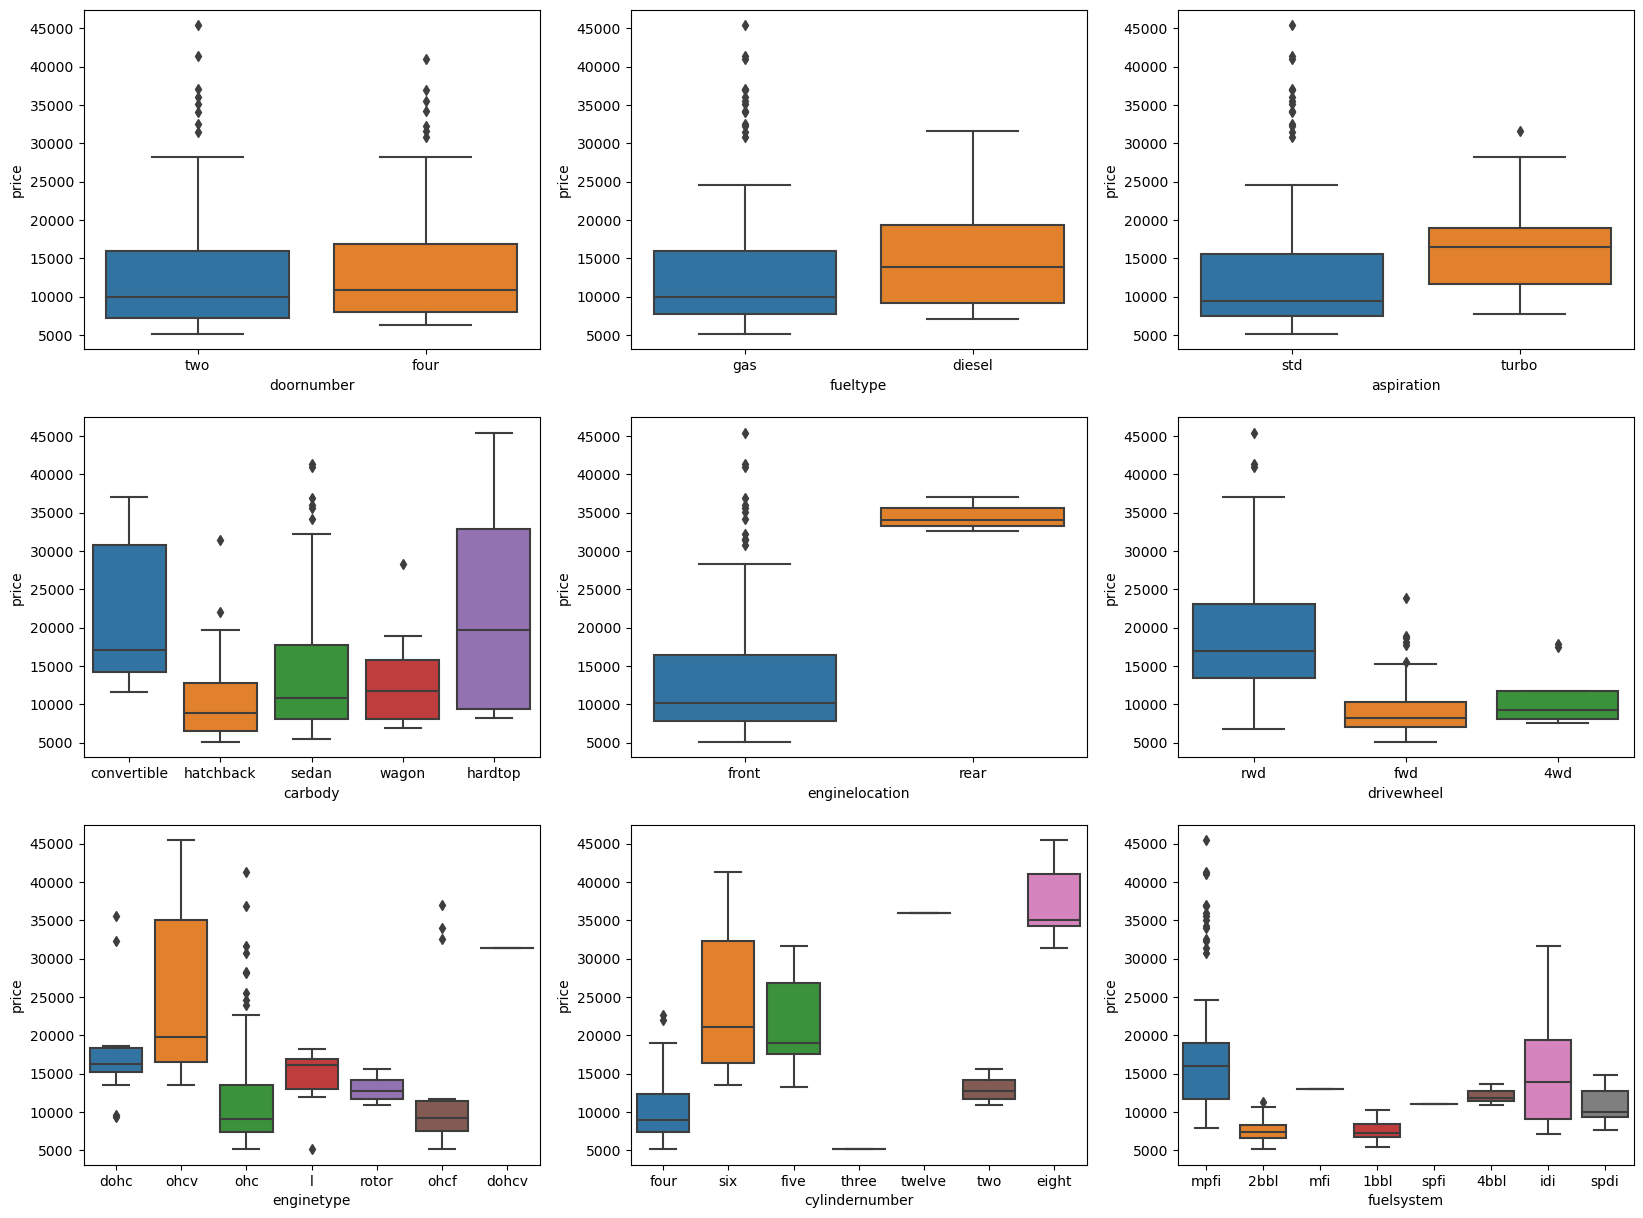

In [17]:
#Boxplot of all the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()


**Findings:**
* Diesel fueltype cars are comparatively expensive than the cars with fueltype as gas.
* All the types of carbody is relatively cheaper as compared to convertible and hardtop carbody.
* The cars with rear enginelocation are way expensive than cars with front enginelocation.
* rwd drivewheel car price is always very high.
* Enginetype ohcv comes into higher price range cars.
* The price of car is directly proportional to no. of cylinders in most cases.

## 4. Data Modelling and evaluation

In [18]:
X=df[numerical_columns].drop('price',axis=1)
y=df['price']

In [19]:
# Create the RFE object
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a base model (Random Forest)
model = RandomForestRegressor()

# Create the RFE model and select 5 features
rfe = RFE(estimator=model, n_features_to_select=5,step=1)
rfe_fit = rfe.fit(X, y)
X.columns[rfe.support_]
feature=X.columns[rfe.support_]
print(feature)

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'highwaympg'], dtype='object')


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#Specify Prediction Target
y=df.price
feature=X.columns[rfe.support_]
X=df[feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [22]:
#specify the model. 
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

#Predict the model
lr_test = model.predict(X_test)

#Evaluate the model R² score (Coefficient of Determination) on the test set
lr_score=r2_score(y_test,lr_test)
print('Coefficient of Determination %.2f'%lr_score)

#Mean absolute error
lr_mae=mean_absolute_error(y_test,lr_test)
print('Mean absolute error %.2f'%lr_mae)

Coefficient of Determination 0.76
Mean absolute error 2885.73
